# Basic Linear Regression Model

In [29]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));


This jupyter notebook was executed with:
2.7.14 |Anaconda, Inc.| (default, Nov 20 2017, 18:04:19) 
[GCC 7.2.0]


## Imports

In [30]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

## Importing utilities object
+ imports dataset as lists (a training and test set)


In [31]:
util = Utilities({}, use_json=False)
training_list, testing_list = util.get_datasets()


In [32]:
# turning the datasets into pandas DataFrames 

training_DF, testing_DF = util.create_dataframes(training_list, testing_list)

In [33]:
testing_DF.columns

Index([u'track_id', u'title', u'song_id', u'release', u'artist_id',
       u'artist_mbid', u'artist_name', u'duration', u'artist_familiarity',
       u'artist_hotttnesss', u'year', u'track_7digitalid', u'shs_perf',
       u'shs_work', u'song_hotttnesss', u'danceability', u'energy', u'key',
       u'tempo', u'loudness', u'time_signature'],
      dtype='object')

## meta-data features
+ these have pretty decent positive correlation with song_hotttnesss

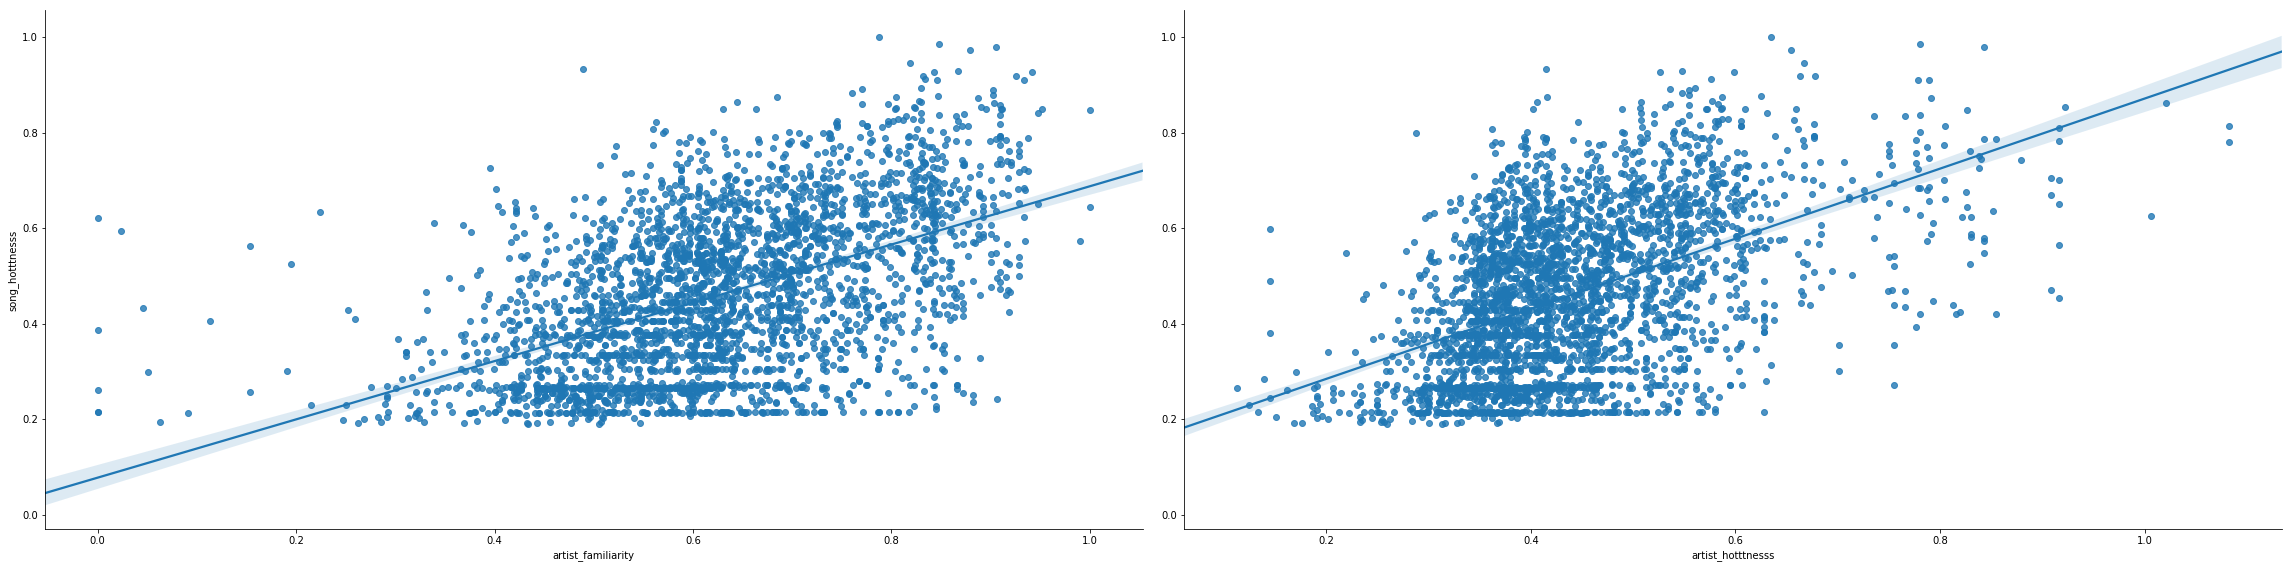

In [34]:
sns.pairplot(training_DF, x_vars=['artist_familiarity', 'artist_hotttnesss'], 
             y_vars='song_hotttnesss', size=8, aspect=2, kind='reg')

## acoustic features
+ very little correlation with these 

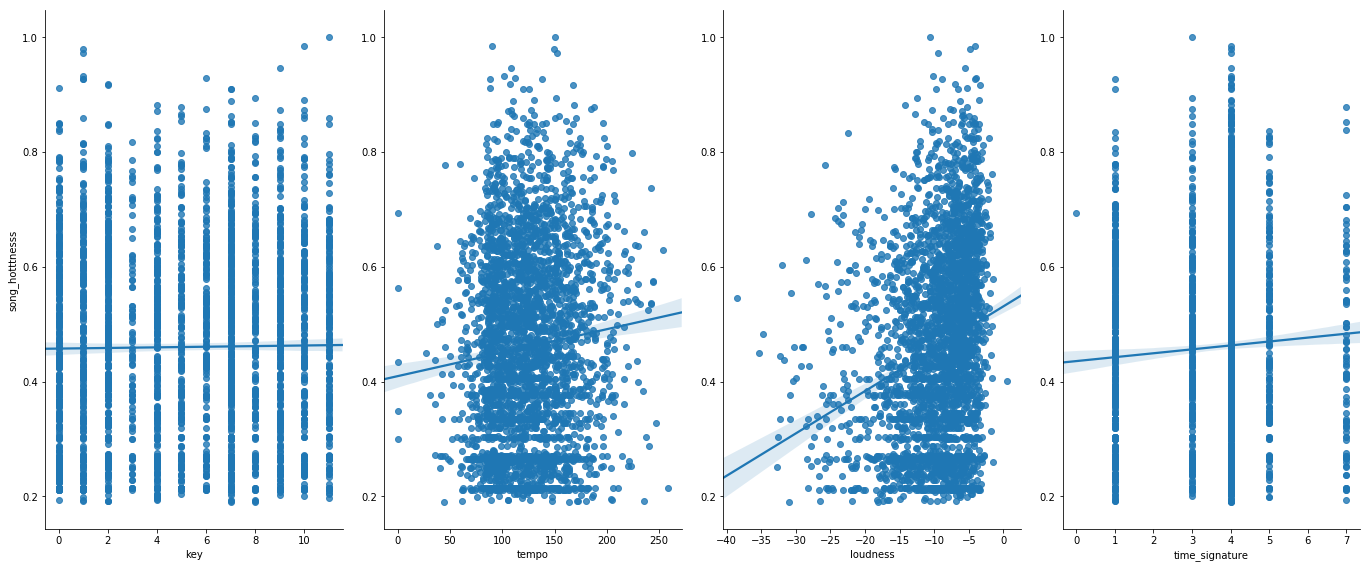

In [35]:
sns.pairplot(training_DF, x_vars=['key', 'tempo', 'loudness', 'time_signature'], 
             y_vars='song_hotttnesss', size=8, aspect=0.6, kind='reg')

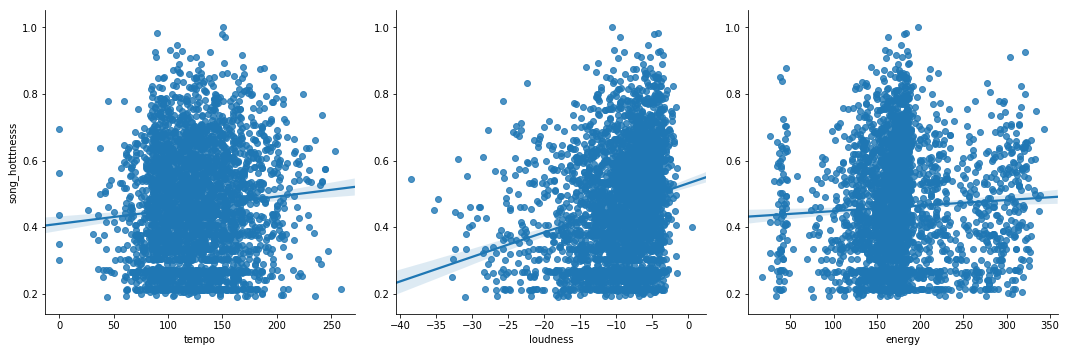

In [36]:
loudness = training_DF['loudness']
tempo = training_DF['tempo']
time_sig = training_DF['time_signature']

training_DF['energy'] = (50+loudness)*(8-time_sig)



sns.pairplot(training_DF, x_vars=['tempo', 'loudness', 'energy'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=5, aspect=1, kind='reg')

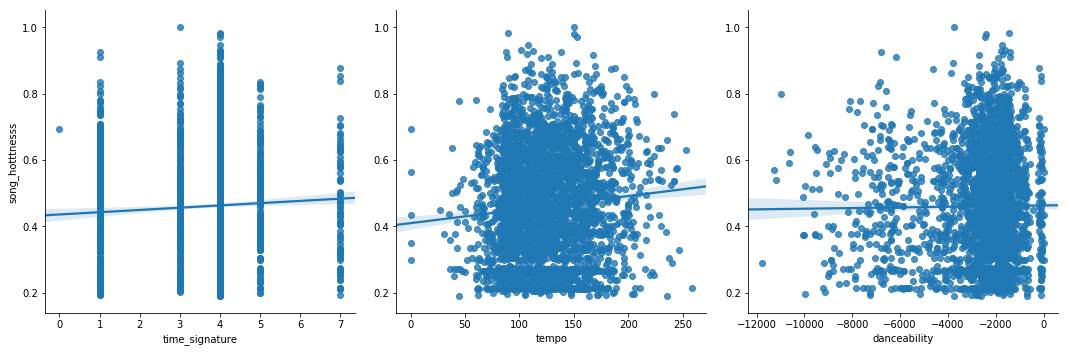

In [37]:
loudness = training_DF['loudness']
tempo = training_DF['tempo']
time_sig = training_DF['time_signature']

training_DF['danceability'] = -(8-time_sig)**2*(tempo)



sns.pairplot(training_DF, x_vars=['time_signature', 'tempo', 'danceability'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=5, aspect=1,  kind='reg')

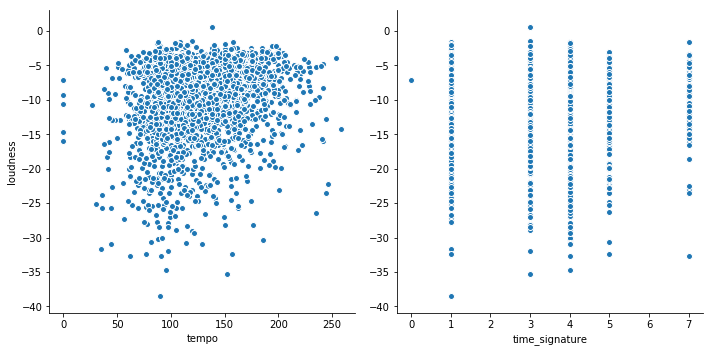

In [38]:
sns.pairplot(training_DF, x_vars=['tempo', 'time_signature'], y_vars='loudness', size=5, aspect=1)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

### using metadata (familiarity and artist_hott)

In [69]:
X_cols = "artist_familiarity artist_hotttnesss".split()
X = training_DF[X_cols]
y = training_DF['song_hotttnesss']

linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
print "training set", metrics.mean_absolute_error(y, y_pred) 

y_pred = linreg.predict(testing_DF[X_cols])
y_test = testing_DF['song_hotttnesss']
print "testing set", metrics.mean_absolute_error(y_test, y_pred)


training set 0.117700041609
testing set 0.118272046009


0.117700041609


0.117700041609


### using acoustic features 

training set 0.117700041609
testing set 0.118272046009
0.168306600195


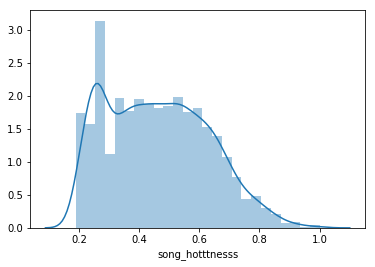

In [89]:
X_cols = "artist_familiarity artist_hotttnesss".split()
X = training_DF[X_cols]
y = training_DF['song_hotttnesss']

linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)
print "training set", metrics.mean_absolute_error(y, y_pred) 

y_pred = linreg.predict(testing_DF[X_cols])
y_test = testing_DF['song_hotttnesss']
print "testing set", metrics.mean_absolute_error(y_test, y_pred)


total_DF = training_DF.append(testing_DF)

print y.std()
sns.distplot(total_DF['song_hotttnesss'])

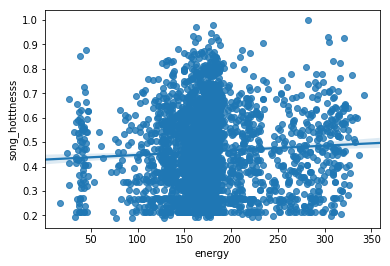

In [11]:
sns.regplot(x="energy", y="song_hotttnesss", data=training_DF)

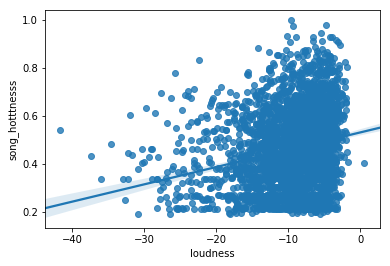

In [12]:
sns.regplot(x="loudness", y="song_hotttnesss", data=training_DF)

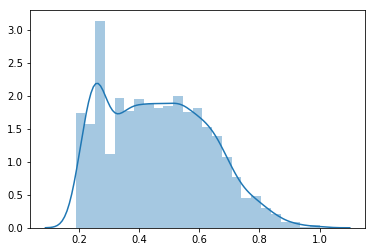

In [78]:
# for funsies 
hot = util.get_hotttnesss_list()
sns.distplot(hot)

## Training the model

In [14]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
# train_predicted, train_expected, train_rscore = train_model(linear_reg, training_set, artist_mapping, num_artists, get_train_error=True)
